In [66]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Parsing

In [523]:
COLS = 8

NONE = "base"
TWICE = "row+column"
ONCE = "row"

def parse_dasp_file(filename, ordering=NONE):
    res = {"name": [], "time": [], "algo": [], "ordering": []}
    nnz_map = {}
    with open(filename, 'r') as file:
        lines = file.readlines()

    for line in lines:
        dubrovnik = line.split(",")
        if len(dubrovnik) == 7:
            # cusparse
            name = dubrovnik[0].split('/')[-1].split('.')[0]
            time = float(dubrovnik[5])
            nnz = int(dubrovnik[3])
            nnz_map[name] = nnz
            res["name"].append(name)
            res["time"].append(time)
            res["algo"].append("cuSPARSE")
            res["ordering"].append(ordering)

        else:
            # dasp
            name = dubrovnik[0].split('/')[-1].split('.')[0]
            time = float(dubrovnik[-7]) * COLS
            res["name"].append(name)
            res["time"].append(time)
            res["algo"].append("DASP")
            res["ordering"].append(ordering)

    return res, nnz_map


def parse_dasp_file_ordered(filename):
    res = {"name": [], "time": [], "algo": [], "ordering": []}
    nnz_map = {}
    with open(filename, 'r') as file:
        lines = file.readlines()

    for line in lines:
        dubrovnik = line.split(",")
        if len(dubrovnik) == 7:
            # cusparse
            name = dubrovnik[0].split('/')[-1].split('.')[0]
            index = name.find('_reordered')
            name = name[:index]
            time = float(dubrovnik[5])
            nnz = int(dubrovnik[3])
            nnz_map[name] = nnz
            res["name"].append(name)
            res["time"].append(time)
            res["algo"].append("cuSPARSE")
            
        else:
            # dasp
            name = dubrovnik[0].split('/')[-1].split('.')[0]
            index = name.find('_reordered')
            name = name[:index]
            time = float(dubrovnik[-7]) * COLS
            res["name"].append(name)
            res["time"].append(time)
            res["algo"].append("DASP")
            
        if "transposed" in dubrovnik[0]:
            res["ordering"].append(TWICE)
        else:
            res["ordering"].append(ONCE)
    return res, nnz_map

def parse_smatel(filename, ordering=TWICE):
    res = {"name": [], "time": [], "algo": [], "ordering": []}
    with open(filename, 'r') as file:
        lines = file.readlines()

    for line in lines:
        dubrovnik = line.split(",")
        # SMaTeL
        name = dubrovnik[0].split('/')[-1].split('.')[0]
        last_underscore_index = name.find('_reordered')
        name = name[:last_underscore_index]
        time = float(dubrovnik[1])
        res["name"].append(name)
        res["time"].append(time)
        res["algo"].append("SMaTeL")
        res["ordering"].append(ordering)
    return res

def parse_smatel_all(filename):
    res = {"name": [], "time": [], "algo": [], "ordering": []}
    with open(filename, 'r') as file:
        lines = file.readlines()

    for line in lines:
        dubrovnik = line.split(",")
        # SMaTeL
        name = dubrovnik[0].split('/')[-1].split('.')[0]
        if "reordered" in name:
            last_underscore_index = name.find('_reordered')
            if "transposed" in name:
                res["ordering"].append(TWICE)
            else:
                res["ordering"].append(ONCE)
            name = name[:last_underscore_index]
        else:
            res["ordering"].append(NONE)
        
        time = float(dubrovnik[1])
        res["name"].append(name)
        res["time"].append(time)
        res["algo"].append("SMaT")
        
    return res

def parse_smatel_once(filename, ordering=ONCE):
    res = {"name": [], "time": [], "algo": [], "ordering": []}
    with open(filename, 'r') as file:
        lines = file.readlines()

    for line in lines:
        dubrovnik = line.split(",")
        # SMaTeL
        name = dubrovnik[0].split('/')[-1].split('.')[0]
        last_underscore_index = name.find('_reordered')
        name = name[:last_underscore_index]
        time = float(dubrovnik[1])
        res["name"].append(name)
        res["time"].append(time)
        res["algo"].append("SMaTeL")
        res["ordering"].append(ordering)

    return res

def parse_smatel_no(filename, ordering=NONE):
    res = {"name": [], "time": [], "algo": [], "ordering": []}
    with open(filename, 'r') as file:
        lines = file.readlines()

    for line in lines:
        dubrovnik = line.split(",")
        # SMaTeL
        name = dubrovnik[0].split('/')[-1].split('.')[0]
        # last_underscore_index = name.find('_reordered')
        # name = name[:last_underscore_index]
        time = float(dubrovnik[1])
        res["name"].append(name)
        res["time"].append(time)
        res["algo"].append("SMaTeL")
        res["ordering"].append(ordering)

    return res

def parse_magicube_file(filename, ordering=NONE):
    res = {"name": [], "time": [], "algo": [], "ordering": []}
    with open(filename, 'r') as file:
        lines = file.readlines()

    for line in lines:
        if line.startswith('Sparse'):
            name = line.split()[-1].split('/')[-1].split('.')[0]
            last_underscore_index = name.rfind('_')
            name = name[:last_underscore_index]
            res["name"].append(name)
            res["algo"].append("Magicube")
            res["ordering"].append(ordering)
        elif line.startswith('Magicube'):
            time = float(line.split()[-2])
            res["time"].append(time)

    return res

def parse_magicube_file_ordered(filename, ordering=NONE):
    res = {"name": [], "time": [], "algo": [], "ordering": []}
    with open(filename, 'r') as file:
        lines = file.readlines()

    for line in lines:
        if line.startswith('Sparse'):
            name = line.split()[-1].split('/')[-1].split('.')[0]
            if "transposed" in name:
                res["ordering"].append(TWICE)
            else:
                res["ordering"].append(ONCE)
            last_underscore_index = name.find('_reordered')
            name = name[:last_underscore_index]
            res["name"].append(name)
            res["algo"].append("Magicube")
        
        elif line.startswith('Magicube'):
            time = float(line.split()[-2])
            res["time"].append(time)

    return res
        

def create_bar_chart():
    # Define the data for the bars
    x = ['Group 1', 'Group 2', 'Group 3']
    y1 = [10, 15, 12]  # Values for the first group
    y2 = [8, 11, 9]    # Values for the second group

    # Set the width of the bars
    bar_width = 0.35

    # Set the positions of the bars on the x-axis
    bar_positions1 = range(len(x))
    bar_positions2 = [pos + bar_width for pos in bar_positions1]

    # Create the bar chart
    plt.bar(bar_positions1, y1, width=bar_width, label='Group 1')
    plt.bar(bar_positions2, y2, width=bar_width, label='Group 2')

    # Add labels and title
    plt.xlabel('Groups')
    plt.ylabel('Values')
    plt.title('Grouped Bar Chart')

    # Add legend
    plt.legend()

    # Show the chart
    plt.show()

def grouped_bar_chart():
    species = ("Adelie", "Chinstrap", "Gentoo")
    penguin_means = {
        'Bill Depth': (18.35, 18.43, 14.98),
        'Bill Length': (38.79, 48.83, 47.50),
        'Flipper Length': (189.95, 195.82, 217.19),
    }

    x = np.arange(len(species))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in penguin_means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Length (mm)')
    ax.set_title('Penguin attributes by species')
    ax.set_xticks(x + width, species)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 250)

    plt.show()


def grouped_bar_chart_tflops():
    species = ("Adelie", "Chinstrap", "Gentoo")
    penguin_means = {
        'Bill Depth': (18.35, 18.43, 14.98),
        'Bill Length': (38.79, 48.83, 47.50),
        'Flipper Length': (189.95, 195.82, 217.19),
    }

    x = np.arange(len(species))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in penguin_means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Length (mm)')
    ax.set_title('Penguin attributes by species')
    ax.set_xticks(x + width, species)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 250)

    plt.show()
        

def time_depending_on_n():

    # Create a figure and axes
    fig, ax = plt.subplots()
    

    # DASP
    x = [1, 4, 8, 16, 24, 32,] # 40, 48, 56, 64, 72, 80, 88, 96, 104] #200, 400, 1000]
    y = [0.0297 * i for i in x]

    # Create the plot
    plt.plot(x, y, label='DASP', marker='x', color='tab:green')

    
    # plt.title('DASP Performance')

    # cusparse
    x = [1, 4, 8, 16, 24, 32, ] #40, 48, 56, 64, 72, 80, 88, 96, 104]# 200, 400, 1000]
    y = [0.293400, 0.457800, 0.705500, 1.142200, 1.824100, 2.280200,] # 3.096400, 3.522400, 4.299400, 4.725100, 4.410700, 4.743300, 6.979200, 7.160500, 7.834200] # 14.315900, 24.538700, 60.067200]
    plt.plot(x, y, label='cuSPARSE', marker='o', color='tab:orange')

    # Magicube
    x = [1, 4, 8, 16, 24, 32,] # 40, 48, 56, 64, 72, 80, 88, 96, 104] #200, 400, 1000]
    y = [0.744876, 0.766356, 0.777793, 0.816469, 0.815408, 0.827263,] # 0.783243, 0.775415, 0.788676, 0.840527, 1.54783, 1.54311, 1.54301, 1.52666, 1.60832] # 3.06065, 5.3284, 12.1257]
    plt.plot(x, y, label='Magicube', marker='s', color='tab:blue')

    # ours
    # List of values for the stairs
    val = [0.125542, 0.179610, 0.239616, 0.298086, 0.295731,] # 0.343142, 0.391578, 0.439808, 0.485334, 0.531610, 0.579130, 0.626765, 0.720915]
    x, y = [], []
    found = False
    for i in range(len(val)):
        for j in range(1, 9):
            if i * 8 + j == 32:
                found = True
            x.append(i * 8 + j)
            y.append(val[i])
        if found:
            break
    # Create the stairs plot
    print(x, y)
    plt.step(x, y, where='post', label='SMaT', color='tab:red')

    plt.grid(False)
    ax.tick_params(color='black', labelcolor='black')
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
    #plt.xlabel("Selection Ratio (%)", fontsize=12, fontweight='bold')
    #plt.ylabel("Accuracy (%)", fontsize=12, fontweight='bold')
    # Add labels and title
    plt.xlabel('N', fontsize=12, ) #fontweight='bold')
    plt.ylabel('Compute time [ms]', fontsize=12,) # fontweight='bold')
    # Add legend
    plt.legend(fontsize = 12)

    ax.grid(axis='y')

    plt.savefig('zoomedin_lineplot.pdf')


    # Show the plot
    plt.show()
    


def plot_bar_chart(df, filename="representative.pdf"):
    # fig, ax = plt.subplots()
    plt.figure(figsize=(20, 10))  # Adjust the width as needed
    sns.barplot(df, x="name", y="GFLOPS", hue="algo")
    plt.grid(False)
    #ax.tick_params(color='black', labelcolor='black')
    #for spine in ax.spines.values():
    #    spine.set_edgecolor('black')

    # Add labels and title
    plt.ylabel('GFLOPS', fontsize=12, fontweight='bold')
    plt.xlabel("")
    plt.legend(title='',)
    plt.savefig(filename)    


# Figure 4 - 8

In [405]:
df1 = pd.DataFrame(parse_magicube_file("magicube.out"))
res, nnz_map = parse_dasp_file("spmv_f16_record_2103.csv")
df2 = pd.DataFrame(res)
df3 = pd.DataFrame(parse_smatel("twice_ordered.csv"))
possible_smatel = df3["name"].unique()
df = pd.concat([df1, df2, df3], ignore_index=True)
df["nnz"] = df["name"].map(nnz_map)
df["GFLOPS"] = (2 * df["nnz"] * COLS) / (df["time"] * 1e6)
df = df[df['name'].isin(possible_smatel)]
# df["name"].unique()

In [406]:
orderA = ['mip1', 'cant', 'pdb1HYS', 'rma10', 'cop20k_A', 'consph', 'shipsec1','dc2', 'conf5_4..']
hue_orderA = [NONE, ONCE, TWICE]

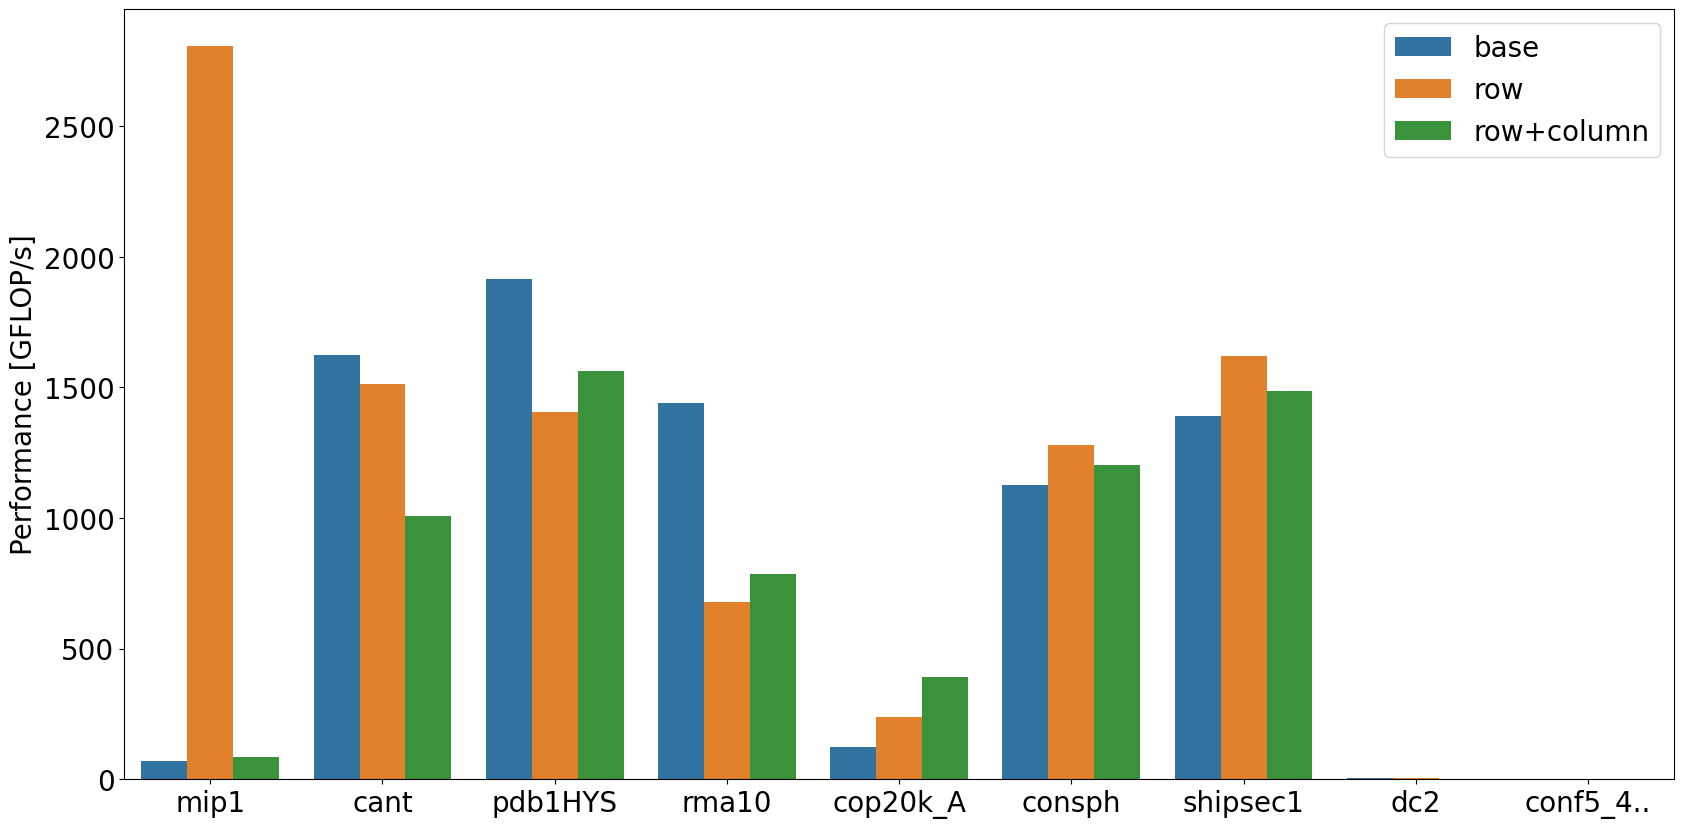

In [407]:
# smatel
df1_smatel = pd.DataFrame(parse_smatel("twice_ordered.csv"))
df2_smatel = pd.DataFrame(parse_smatel_no("no_ordered_no_cuda_timer.csv", ordering=NONE))
df3_smatel = pd.DataFrame(parse_smatel_once("once_ordered_no_cuda_timer.csv", ordering=ONCE))
df_smatel = pd.concat([df1_smatel, df2_smatel, df3_smatel], ignore_index=True)
df_smatel["nnz"] = df_smatel["name"].map(nnz_map)
df_smatel["GFLOPS"] = (2 * df_smatel["nnz"] * COLS) / (df_smatel["time"] * 1e6)

# fig, ax = plt.subplots()
plt.figure(figsize=(20, 10))  # Adjust the width as needed

sns.barplot(df_smatel, x="name", y="GFLOPS", hue="ordering", order=orderA, hue_order=hue_orderA)
plt.grid(False)
#ax.tick_params(color='black', labelcolor='black')
#for spine in ax.spines.values():
#    spine.set_edgecolor('black')

# Add labels and title
# Add labels and title
fs = 20
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('Performance [GFLOP/s]', fontsize=fs, ) # fontweight='bold')
plt.xlabel("")
plt.legend(title='', fontsize=fs)
plt.savefig("ordering_effect_smatel.pdf")

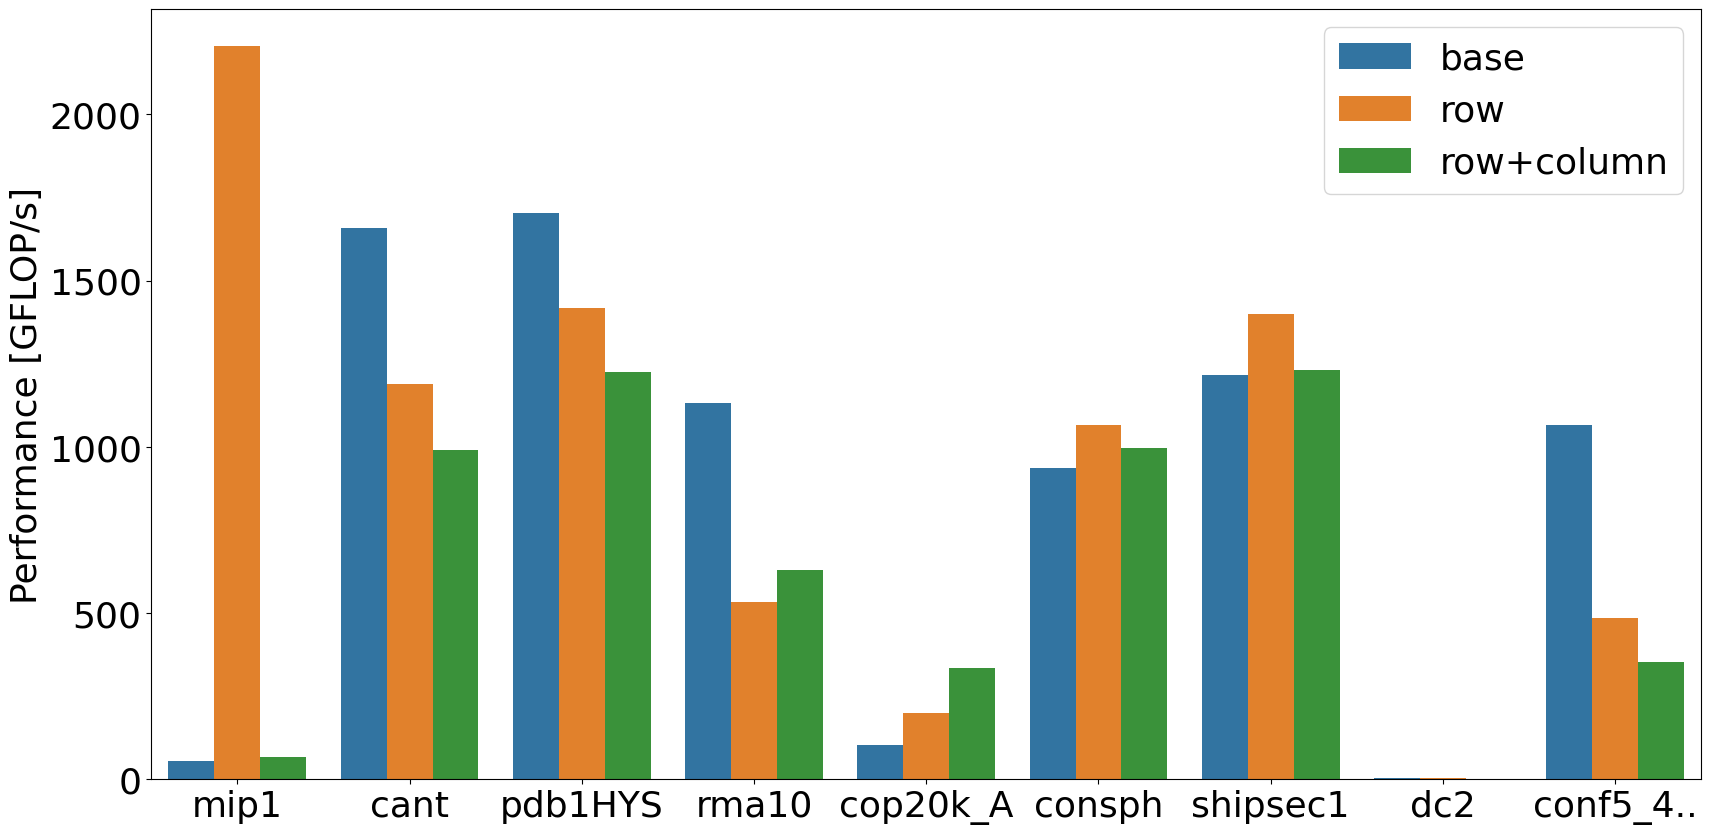

In [408]:
# smatel - rerun
df_smatel = pd.DataFrame(parse_smatel_all("representative_orderings_smatel.csv"))
df_smatel["nnz"] = df_smatel["name"].map(nnz_map)
df_smatel["GFLOPS"] = (2 * df_smatel["nnz"] * COLS) / (df_smatel["time"] * 1e6)
df_smatel['name'] = df_smatel['name'].str.replace('conf5_4-8x8-10', 'conf5_4..')

# fig, ax = plt.subplots()
plt.figure(figsize=(20, 10))  # Adjust the width as needed
sns.barplot(df_smatel, x="name", y="GFLOPS", hue="ordering", order=orderA, hue_order=hue_orderA)
plt.grid(False)
#ax.tick_params(color='black', labelcolor='black')
#for spine in ax.spines.values():
#    spine.set_edgecolor('black')

# Add labels and title
fs = 26
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('Performance [GFLOP/s]', fontsize=fs, ) # fontweight='bold')
plt.xlabel("")
plt.legend(title='', fontsize=fs)
plt.savefig("ordering_effect_smatel.pdf")

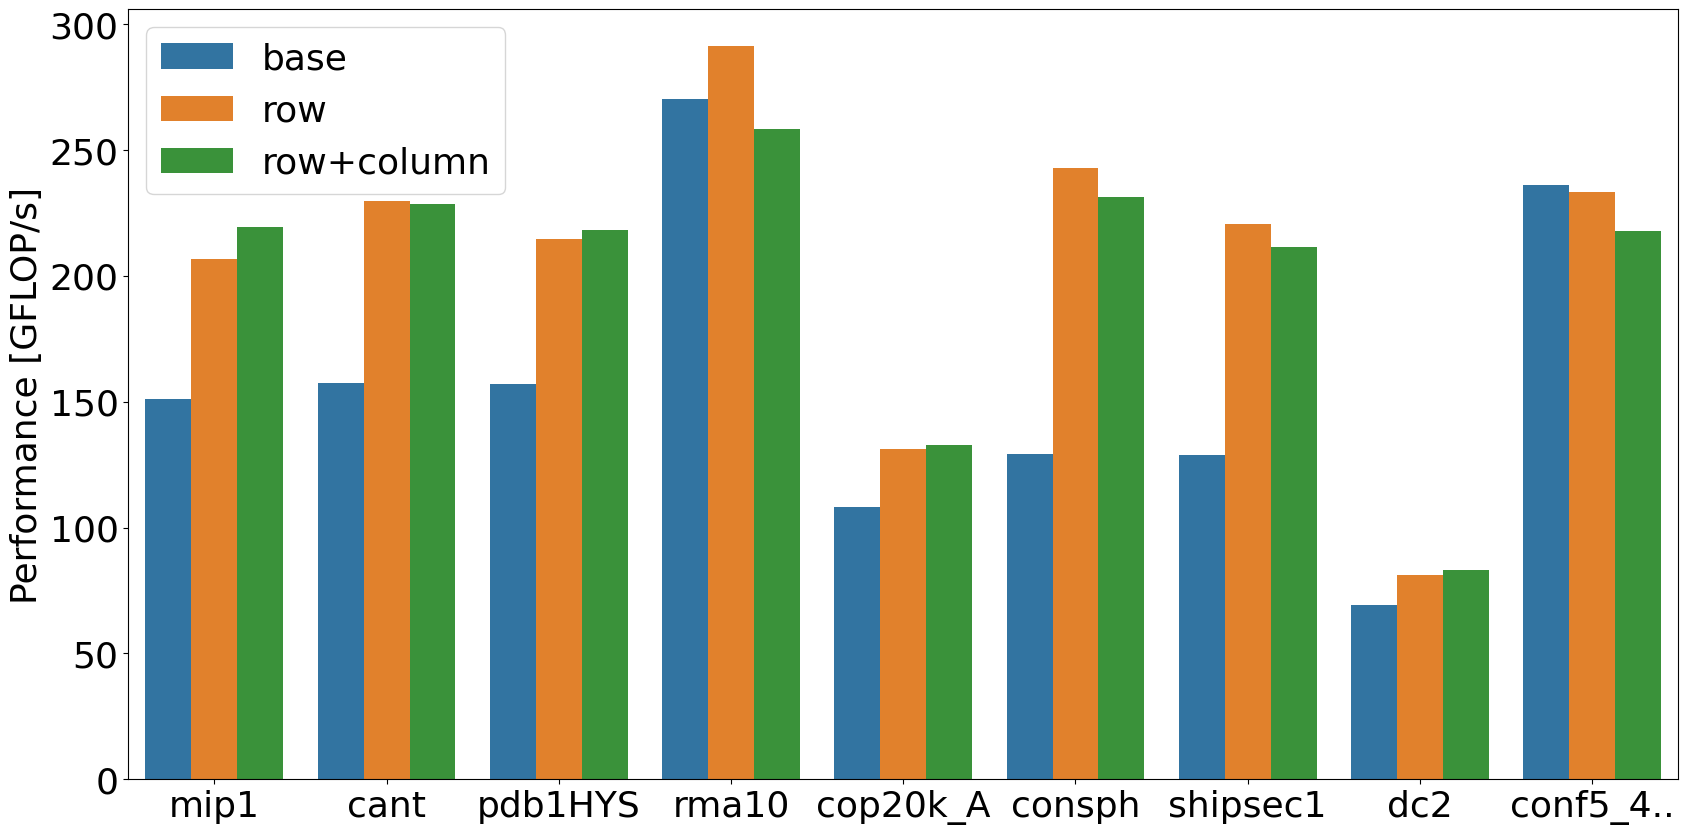

In [409]:
# dasp
res1, nnz_map = parse_dasp_file("spmv_f16_record_2103.csv")
df1_dasp = pd.DataFrame(res1)
res2, nnz_map = parse_dasp_file_ordered("spmm_twice_once_oredered_cusparse_dasp.csv")
df2_dasp = pd.DataFrame(res2)
df_dasp = pd.concat([df1_dasp, df2_dasp,], ignore_index=True)
df_dasp = df_dasp[df_dasp['name'].isin(possible_smatel)]
df_dasp = df_dasp[df_dasp['algo'] == "DASP"]
df_dasp["nnz"] = df_dasp["name"].map(nnz_map)
df_dasp["GFLOPS"] = (2 * df_dasp["nnz"] * COLS) / (df_dasp["time"] * 1e6)
df_dasp['name'] = df_dasp['name'].str.replace('conf5_4-8x8-10', 'conf5_4..')
# fig, ax = plt.subplots()
plt.figure(figsize=(20, 10))  # Adjust the width as needed
sns.barplot(df_dasp, x="name", y="GFLOPS", hue="ordering", order=orderA, hue_order=hue_orderA)
plt.grid(False)
#ax.tick_params(color='black', labelcolor='black')
#for spine in ax.spines.values():
#    spine.set_edgecolor('black')

fs = 26
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('Performance [GFLOP/s]', fontsize=fs, ) # fontweight='bold')
plt.xlabel("")
plt.legend(title='', fontsize=fs)
plt.savefig("ordering_effect_dasp.pdf")

              name      time      algo    ordering
2             mip1  3.847650  Magicube        base
3   conf5_4-8x8-10  0.494561  Magicube        base
4             cant  0.582389  Magicube        base
6          pdb1HYS  0.474624  Magicube        base
7            rma10  0.418368  Magicube        base
8         cop20k_A  0.804905  Magicube        base
12          consph  0.791221  Magicube        base
14        shipsec1  1.207650  Magicube        base
17             dc2  6.619570  Magicube        base
20  conf5_4-8x8-10  0.451251  Magicube  row+column
21         pdb1HYS  0.364266  Magicube         row
22        cop20k_A  0.632316  Magicube         row
23            cant  0.498634  Magicube  row+column
24          consph  0.706691  Magicube         row
25        shipsec1  0.978254  Magicube  row+column
26             dc2  6.539650  Magicube         row
27         pdb1HYS  0.364780  Magicube  row+column
28             dc2  6.548100  Magicube  row+column
29            mip1  3.727530  M

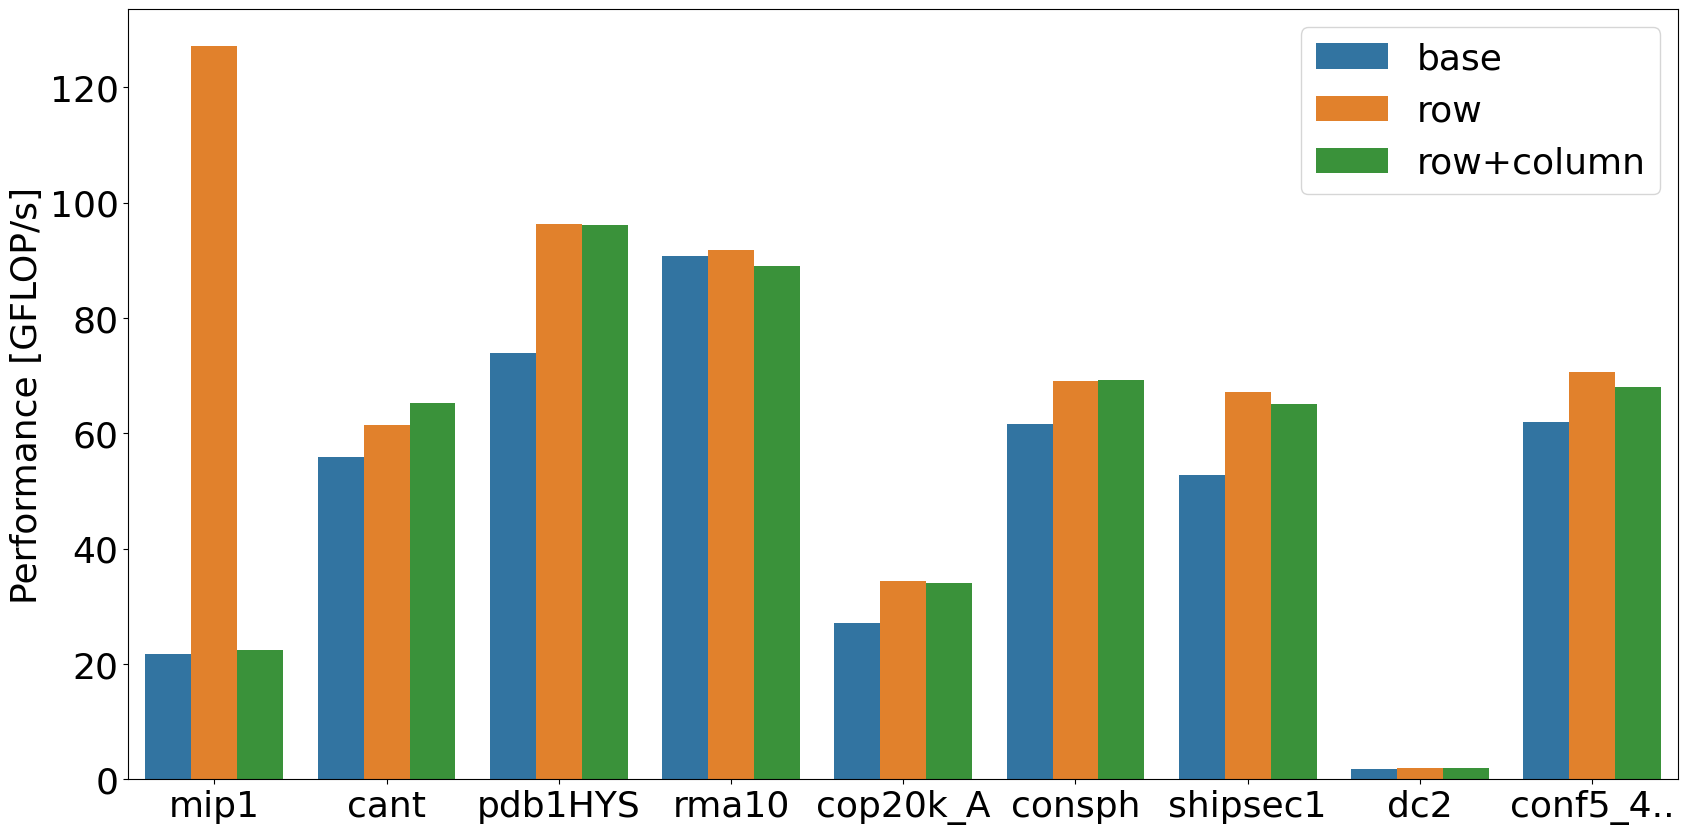

In [410]:
# magicube
df1_magicube = pd.DataFrame(parse_magicube_file("magicube.out"))
df2_magicube = pd.DataFrame(parse_magicube_file_ordered("representative_ordered_magicube.out"))

df_magicube = pd.concat([df1_magicube, df2_magicube,], ignore_index=True)
df_magicube = df_magicube[df_magicube['name'].isin(possible_smatel)]
print(df_magicube)
df_magicube = df_magicube[df_magicube['algo'] == "Magicube"]
df_magicube["nnz"] = df_magicube["name"].map(nnz_map)
df_magicube["GFLOPS"] = (2 * df_magicube["nnz"] * COLS) / (df_magicube["time"] * 1e6)
df_magicube['name'] = df_magicube['name'].str.replace('conf5_4-8x8-10', 'conf5_4..')
# print(df_dasp)
# fig, ax = plt.subplots()
plt.figure(figsize=(20, 10))  # Adjust the width as needed
sns.barplot(df_magicube, x="name", y="GFLOPS", hue="ordering", order=orderA, hue_order=hue_orderA)
plt.grid(False)
#ax.tick_params(color='black', labelcolor='black')
#for spine in ax.spines.values():
#    spine.set_edgecolor('black')

# Add labels and title
fs = 26
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('Performance [GFLOP/s]', fontsize=fs, ) # fontweight='bold')
plt.xlabel("")
plt.legend(title='', fontsize=fs)
plt.savefig("ordering_effect_magicube.pdf")

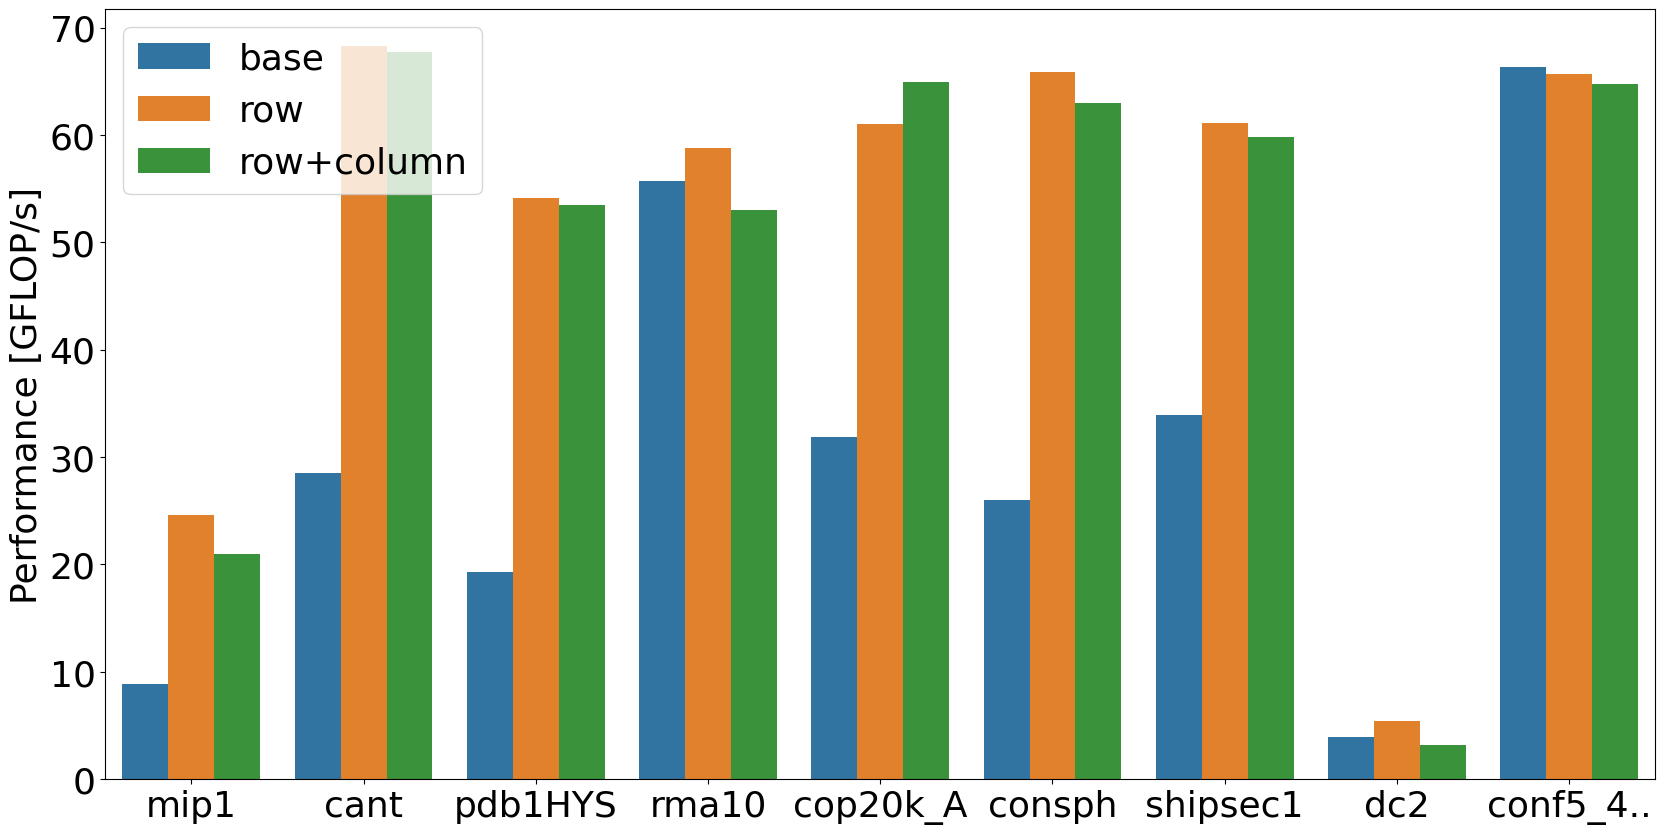

In [411]:
# cusparse
res1, nnz_map = parse_dasp_file("spmv_f16_record_2103.csv")
df1_cusparse = pd.DataFrame(res1)
res2, nnz_map = parse_dasp_file_ordered("spmm_twice_once_oredered_cusparse_dasp.csv")
df2_cusparse = pd.DataFrame(res2)
df_cusparse = pd.concat([df1_cusparse, df2_cusparse,], ignore_index=True)
df_cusparse = df_cusparse[df_cusparse['name'].isin(possible_smatel)]
df_cusparse = df_cusparse[df_cusparse['algo'] == "cuSPARSE"]
df_cusparse["nnz"] = df_cusparse["name"].map(nnz_map)
df_cusparse["GFLOPS"] = (2 * df_cusparse["nnz"] * COLS) / (df_cusparse["time"] * 1e6)
df_cusparse['name'] = df_cusparse['name'].str.replace('conf5_4-8x8-10', 'conf5_4..')

# print(df_dasp)
# fig, ax = plt.subplots()
plt.figure(figsize=(20, 10))  # Adjust the width as needed
sns.barplot(df_cusparse, x="name", y="GFLOPS", hue="ordering", order=orderA, hue_order=hue_orderA)
plt.grid(False)
#ax.tick_params(color='black', labelcolor='black')
#for spine in ax.spines.values():
#    spine.set_edgecolor('black')

# Add labels and title
fs = 26
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('Performance [GFLOP/s]', fontsize=fs, ) # fontweight='bold')
plt.xlabel("")
plt.legend(title='', fontsize=fs)
plt.savefig("ordering_effect_cusparse.pdf")

['mip1' 'conf5_4-8x8-10' 'cant' 'pdb1HYS' 'rma10' 'cop20k_A' 'consph'
 'shipsec1' 'dc2']
              name    time  algo    ordering       nnz       GFLOPS    TFLOPS
62            cant  0.0387  SMaT        base   4007383  1656.799173  1.656799
63  conf5_4-8x8-10  0.0288  SMaT        base   1916928  1064.960000  1.064960
64          consph  0.0902  SMaT         row   6010480  1066.160532  1.066161
65        cop20k_A  0.1258  SMaT  row+column   2624331   333.778188  0.333778
66             dc2  4.8799  SMaT        base    766396     2.512825  0.002513
67            mip1  0.0751  SMaT         row  10352819  2205.660506  2.205661
68         pdb1HYS  0.0408  SMaT        base   4344765  1703.829412  1.703829
69           rma10  0.0336  SMaT        base   2374001  1130.476667  1.130477
70        shipsec1  0.0894  SMaT         row   7813404  1398.372081  1.398372


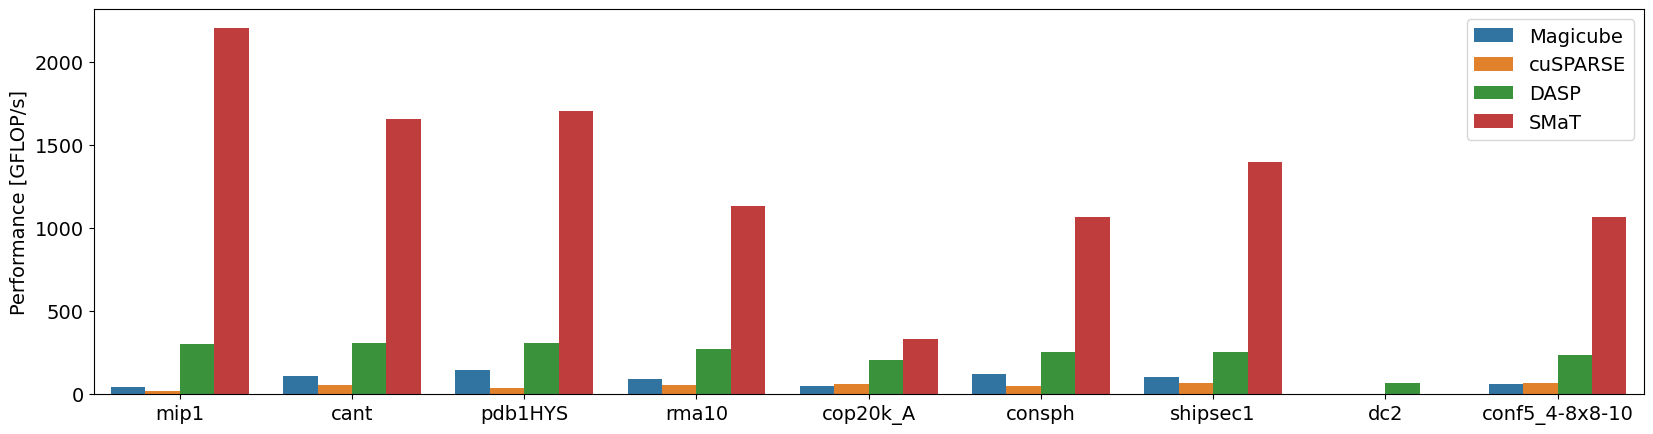

In [531]:
res, nnz_map = parse_dasp_file("spmv_f16_record_2103.csv")
df2 = pd.DataFrame(res)
df2["nnz"] = df2["name"].map(nnz_map)
df2["GFLOPS"] = (2 * df2["nnz"] * COLS) / (df2["time"] * 1e6)

df1 = pd.DataFrame(parse_magicube_file("magicube.out"))
df1["nnz"] = df1["name"].map(nnz_map)
df1["GFLOPS"] = (2 * df1["nnz"] * COLS) / (df1["time"] * 1e6)


df3 = pd.DataFrame(parse_smatel_all("representative_orderings_smatel.csv"))
df3["nnz"] = df3["name"].map(nnz_map)
df3["GFLOPS"] = (2 * df3["nnz"] * COLS) / (df3["time"] * 1e6)
# print(df3)
max_indices = df3.groupby('name')['GFLOPS'].idxmax()
df3 = df3.loc[max_indices]

possible_smatel = df3["name"].unique()
df = pd.concat([df1, df2, df3], ignore_index=True)
df = df[df['name'].isin(possible_smatel)]

#df['name'] = df['name'].str.replace('conf5_4-8x8-10', 'conf5_4..')


df["TFLOPS"] = (df["GFLOPS"] / 1000.)
print(df["name"].unique())
print(df[df["algo"] == "SMaT"])
# fig, ax = plt.subplots()
plt.figure(figsize=(20, 5))  # Adjust the width as needed
ord = ['mip1', 'cant', 'pdb1HYS', 'rma10', 'cop20k_A', 'consph', 'shipsec1','dc2', 'conf5_4-8x8-10']
sns.barplot(df, x="name", y="GFLOPS", hue="algo", order=ord)
plt.grid(False)
#ax.tick_params(color='black', labelcolor='black')
#for spine in ax.spines.values():
#    spine.set_edgecolor('black')

# Add labels and title
fs = 14
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('Performance [GFLOP/s]', fontsize=fs, ) # fontweight='bold')
plt.xlabel("")
plt.legend(title='', fontsize=fs)
plt.savefig("representative2.svg")

In [529]:
from scipy.stats.mstats import gmean 

df_smatel = df[df["algo"] == "SMaT"]
df_magicube = df[df["algo"] == "Magicube"]
df_dasp = df[df["algo"] == "DASP"]
df_cusparse = df[df["algo"] == "cuSPARSE"]


merged_df1 = pd.merge(df_smatel, df_dasp, on='name', suffixes=('_a', '_b'))
merged_df1['result'] = merged_df1['GFLOPS_a'] / merged_df1['GFLOPS_b']
gm = gmean(merged_df1['result'])
print(f"DASP compared to dasp max:{merged_df1['result'].max()} mean:{gm}")


merged_df2 = pd.merge(df_smatel, df_magicube, on='name', suffixes=('_a', '_b'))
merged_df2['result'] = merged_df2['GFLOPS_a'] / merged_df2['GFLOPS_b']
gm = gmean(merged_df2['result'])
print(f"Magicube compared to dasp max:{merged_df2['result'].max()} mean:{gm}")




merged_df3 = pd.merge(df_smatel, df_cusparse, on='name', suffixes=('_a', '_b'))
merged_df3['result'] = merged_df3['GFLOPS_a'] / merged_df3['GFLOPS_b']
gm = gmean(merged_df3['result'])
print(f"cusparsae compared to dasp max:{merged_df3['result'].max()} mean:{gm}")

print(merged_df2)

concatenated_array = np.concatenate((merged_df1['result'].values, merged_df2['result'].values, merged_df3['result'].values))

print(gmean(concatenated_array))


DASP compared to dasp max:7.343169107856192 mean:2.602158350847587
Magicube compared to dasp max:51.233688415446075 mean:10.783869432841579
cusparsae compared to dasp max:125.47936085219706 mean:16.315546409465295
             name  time_a algo_a  ordering_a     nnz_a     GFLOPS_a  TFLOPS_a  \
0            cant  0.0387   SMaT        base   4007383  1656.799173  1.656799   
1  conf5_4-8x8-10  0.0288   SMaT        base   1916928  1064.960000  1.064960   
2          consph  0.0902   SMaT         row   6010480  1066.160532  1.066161   
3        cop20k_A  0.1258   SMaT  row+column   2624331   333.778188  0.333778   
4             dc2  4.8799   SMaT        base    766396     2.512825  0.002513   
5            mip1  0.0751   SMaT         row  10352819  2205.660506  2.205661   
6         pdb1HYS  0.0408   SMaT        base   4344765  1703.829412  1.703829   
7           rma10  0.0336   SMaT        base   2374001  1130.476667  1.130477   
8        shipsec1  0.0894   SMaT         row   7813404  1

In [236]:
merged_df1['result'].values

array([5.34594315, 4.51083333, 4.18687361, 1.6009539 , 0.03635156,
       7.34316911, 5.47333333, 4.18595238, 5.5335123 ])

# How much SMaTeL is faster than rest in GFLOPS

In [86]:
possible_smatel

array(['cant', 'conf5_4-8x8-10', 'consph', 'cop20k_A', 'dc2', 'pdb1HYS',
       'mip1', 'rma10', 'shipsec1'], dtype=object)

In [527]:
smatel = df[df["algo"] == "SMaTeL"]
cusparse = df[df["algo"] == "cuSPARSE"]
dasp = df[df["algo"] == "DASP"]
magicube = df[df["algo"] == "Magicube"]

smatel["GFLOPS"]

Series([], Name: GFLOPS, dtype: float64)

# Figure 10

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32] [0.125542, 0.125542, 0.125542, 0.125542, 0.125542, 0.125542, 0.125542, 0.125542, 0.17961, 0.17961, 0.17961, 0.17961, 0.17961, 0.17961, 0.17961, 0.17961, 0.239616, 0.239616, 0.239616, 0.239616, 0.239616, 0.239616, 0.239616, 0.239616, 0.298086, 0.298086, 0.298086, 0.298086, 0.298086, 0.298086, 0.298086, 0.298086]


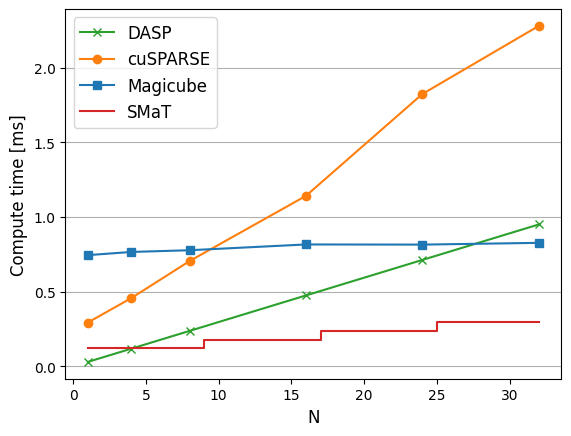

In [524]:
time_depending_on_n()

# Script for preparing once ordered and no ordered representative matrices

In [105]:
import os
available_matrices = ['cant',
 'conf5_4-8x8-10',
 'consph',
 'cop20k_A',
 'dc2',
 'pdb1HYS',
 'mip1',
 'rma10',
 'shipsec1']
path = "/users/pokanovi/sTC/cuda_hgemm/representative_once_order"
for file in os.listdir(path):
    found = False
    for possible in available_matrices:
        if possible in file:
            found = True
            break
    if not found: # this matrix is too big
        os.system(f"mv {path}/{file} /users/pokanovi/sTC/cuda_hgemm/alredy_done")


['cant',
 'conf5_4-8x8-10',
 'consph',
 'cop20k_A',
 'dc2',
 'pdb1HYS',
 'mip1',
 'rma10',
 'shipsec1']

In [110]:
block_size = 16*16
N = 16384
bw = [64, 128, 256, 512, 1024, 2048]
nnz = [N * (2*b + 1) for b in bw]
FLOP = [2 * nnz[i] * 8 for i in range(len(nnz))]

t_coop = [0.012208, 0.018170, 0.030211, 0.058979, 0.148192, 0.291856]
t_nocoop = [0.011482, 0.016941, 0.027712, 0.072858, 0.138461, 0.265805]
t_nobcsr = [0.095165, 0.106717, 0.114688, 0.145371, 0.233379, 0.340518]

Gflops_coop = [FLOP[i] / t_coop[i] /1e6 for i in range(len(t_coop))]
Gflops_nocoop = [FLOP[i] / t_nocoop[i] /1e6 for i in range(len(t_nocoop))]
Gflops_nobcsr = [FLOP[i] / t_nobcsr[i] /1e6 for i in range(len(t_nobcsr))]

print(Gflops_coop)

[2770.0340760157274, 3707.8155200880574, 4451.354539737182, 4555.818172569898, 3624.5752537248977, 3679.9105312208762]


# Figure 2 & 9

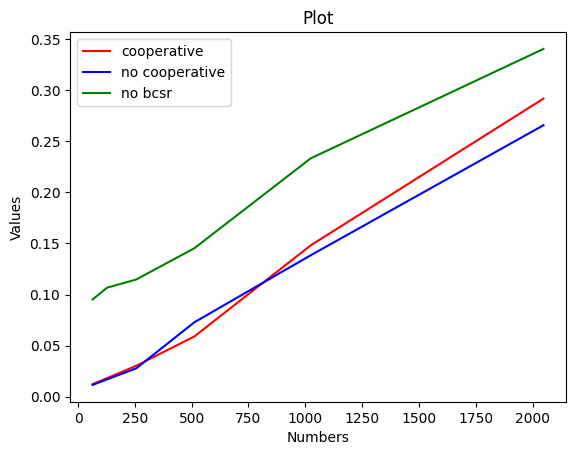

In [106]:
x = [64, 128, 256, 512, 1024, 2048]
y = [0.012208, 0.018170, 0.030211, 0.058979, 0.148192, 0.291856]
plt.plot(x, y, label="cooperative", color='red')

plt.plot([64, 128, 256, 512, 1024, 2048], [0.011482, 0.016941, 0.027712, 0.072858, 0.138461, 0.265805], label="no cooperative", color='blue')


x_additional = [64, 128, 256, 512, 1024, 2048]
y_additional = [0.095165, 0.106717, 0.114688, 0.145371, 0.233379, 0.340518]
plt.plot(x_additional, y_additional, label="no bcsr", color='green')


plt.legend(fontsize = 17)

plt.xlabel('Numbers')
plt.ylabel('Values')
plt.title('Plot')
plt.show()


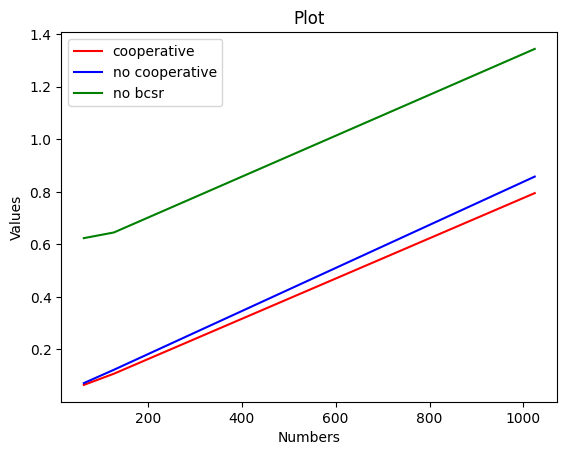

In [112]:
x = [64, 128, 1024]
y = [0.065200, 0.107800, 0.795000,]
plt.plot(x, y, label="cooperative", color='red')


y = [0.072100, 0.122800, 0.857900]
plt.plot(x, y, label="no cooperative", color='blue')

y = [0.623700, 0.645300, 1.343700]
plt.plot(x, y, label="no bcsr", color='green')


plt.legend()

plt.xlabel('Numbers')
plt.ylabel('Values')
plt.title('Plot')
plt.show()

In [345]:
import pandas as pd
import numpy as np

data = {
    'matrix': ['cant.mtx', 'cant_reordered.mtx', 'cant_reordered_transposed.mtx', 'conf5_4-8x8-10.mtx', 'conf5_4-8x8-10_reordered.mtx', 'conf5_4-8x8-10_reordered_transposed.mtx', 'consph.mtx', 'consph_reordered.mtx', 'consph_reordered_transposed.mtx', 'cop20k_A.mtx', 'cop20k_A_reordered.mtx', 'cop20k_A_reordered_transposed.mtx', 'dc2.mtx', 'dc2_reordered.mtx', 'dc2_reordered_transposed.mtx', 'mip1.mtx', 'mip1_reordered.mtx', 'mip1_reordered_transposed.mtx', 'pdb1HYS.mtx', 'pdb1HYS_reordered.mtx', 'pdb1HYS_reordered_transposed.mtx', 'rma10.mtx', 'rma10_reordered.mtx', 'rma10_reordered_transposed.mtx', 'shipsec1.mtx', 'shipsec1_reordered.mtx', 'shipsec1_reordered_transposed.mtx'],
    'total_blocks': [115367, 89257, 115303, 77824, 96931, 145911, 189750, 129879, 172789, 474299, 195617, 191799, 114303, 130802, 147578, 144869, 79602, 105423, 85053, 59055, 74545, 64060, 64188, 70821, 250117, 143260, 166727],
    'min_blocks': [1, 3, 9, 24, 23, 26, 12, 3, 10, 0, 0, 0, 2, 2, 3, 6, 2, 3, 7, 2, 7, 5, 6, 7, 7, 2, 7,],
    'max_blocks': [32, 67, 80, 28, 92, 97, 63, 86, 84, 338, 126, 113, 14490, 14490, 14564, 8308, 178, 8306, 74, 104, 116, 53, 145, 144, 61, 55, 101],
    'mean_blocks': [29.55097336, 22.86296107, 29.53457992, 25.33333333, 31.5530599, 47.49707031, 36.4273373, 24.9335765, 33.17124208, 62.61372937, 25.8240264, 25.32, 15.65151308, 17.91072162, 20.20785978, 34.87457872, 19.16273471, 25.37867116, 37.35309618, 25.93544137, 32.73825209, 21.8784153, 21.92213115, 24.1875, 28.40624645, 16.27030097, 18.9354912],
    'std_blocks': [4.029663, 5.174211, 7.21418, 1.885618, 7.466229, 8.472074, 6.745301, 7.153569, 7.604765, 56.88727, 18.80554, 20.45218, 170.6995, 169.9472, 170.6714, 146.2188, 17.42013, 142.6891, 10.19821, 11.7737, 11.37642, 9.440653, 10.38899, 10.64277, 7.334824, 4.4709, 5.734217]
}

print(len(data['matrix']), len(data['total_blocks']), len(data['min_blocks']), len(data['max_blocks']), len(data['mean_blocks']), len(data['std_blocks']))
df = pd.DataFrame(data)
print(df[-6:])


27 27 27 27 27 27
                               matrix  total_blocks  min_blocks  max_blocks  \
21                          rma10.mtx         64060           5          53   
22                rma10_reordered.mtx         64188           6         145   
23     rma10_reordered_transposed.mtx         70821           7         144   
24                       shipsec1.mtx        250117           7          61   
25             shipsec1_reordered.mtx        143260           2          55   
26  shipsec1_reordered_transposed.mtx        166727           7         101   

    mean_blocks  std_blocks  
21    21.878415    9.440653  
22    21.922131   10.388990  
23    24.187500   10.642770  
24    28.406246    7.334824  
25    16.270301    4.470900  
26    18.935491    5.734217  


# Figure 3

In [495]:
matrix = []
variant = []
blocks = []

additional_matrix = []
additional_variant = []
additional_blocks = []

for index, row in dfsmat.iterrows():
    for val in row["blocks"]:
        if row["matrix"] == "mip1" or row["matrix"] == "dc2":
            additional_blocks.append(val)
            additional_matrix.append(row["matrix"])
            additional_variant.append(row["variant"])
        else:
            blocks.append(val)
            matrix.append(row["matrix"])
            variant.append(row["variant"])

matrix.extend(additional_matrix)
variant.extend(additional_variant)
blocks.extend(additional_blocks)

dfnew = pd.DataFrame({"matrix": matrix, "variant": variant, "blocks": blocks})
dfnew = dfnew[dfnew["matrix"] != "scircuit"]
#dfnew = dfnew.sort_values(by=['matrix' != 'mip1', 'matrix'])

dfnew.loc[dfnew['matrix'] == 'dc2', 'blocks'] = np.log(dfnew.loc[dfnew['matrix'] == 'dc2', 'blocks'])
dfnew.loc[dfnew['matrix'] == 'mip1', 'blocks'] = np.log(dfnew.loc[dfnew['matrix'] == 'mip1', 'blocks'])

/tmp/ipykernel_20912/4255343613.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.69314718 1.09861229 1.09861229 ... 3.52636052 3.73766962 1.79175947]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfnew.loc[dfnew['matrix'] == 'dc2', 'blocks'] = np.log(dfnew.loc[dfnew['matrix'] == 'dc2', 'blocks'])


['1', '7', '54', '403', '2980', '22026', '162754']
['1', '7', '54', '403', '2980', '22026']


/tmp/ipykernel_20912/3046810590.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(current_y_ticks)
/tmp/ipykernel_20912/3046810590.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(current_y_ticks)


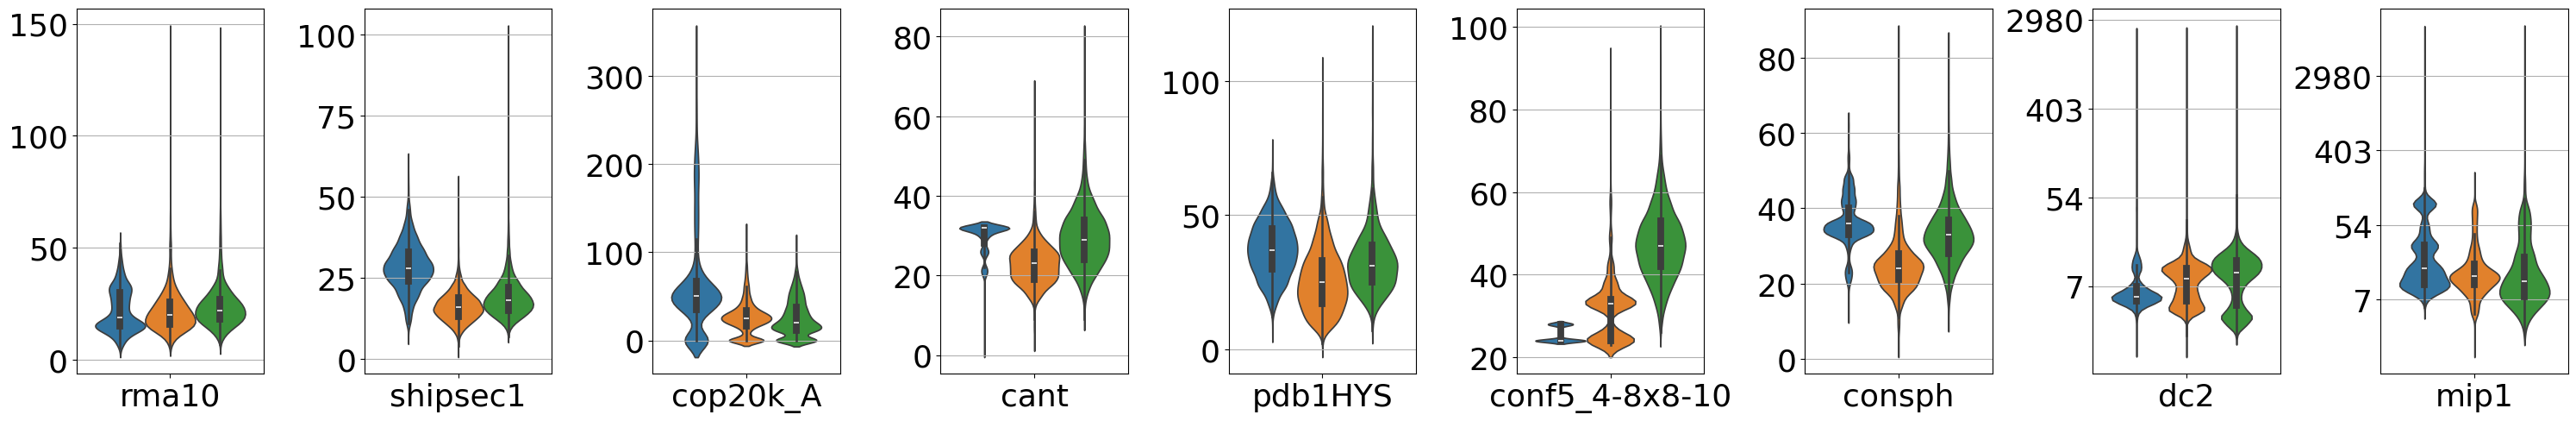

In [522]:
fig, axes = plt.subplots(1, 9, figsize=(30, 5))

# Flatten the axes array to simplify indexing
axes = axes.flatten()
for idx, (mat, ax) in enumerate(zip(dfnew["matrix"].unique(), axes)):
    dfic = dfnew[dfnew["matrix"] == mat]
    # plt.figure()#figsize=(20, 10))
    # if idx == 0:
    #    sns.violinplot(data=dfic, x='matrix', y='blocks', hue="variant", ax=ax)
    # else:
    sns.violinplot(data=dfic, x='matrix', y='blocks', hue="variant", ax=ax, legend=False)
    
    if mat == "dc2" or mat == "mip1":
        current_y_ticks = ax.get_yticks()
        current_y_ticks = [np.exp(y) for y in current_y_ticks]
        
        # current_y_ticks = [f"{y:.0}".replace('+', '').replace('e0', 'e') for y in current_y_ticks]
        current_y_ticks = [f"{int(y)}" for y in current_y_ticks]
        print(current_y_ticks)
        ax.set_yticklabels(current_y_ticks)

    fs = 26
    ax.grid(axis='y')
    ax.tick_params(axis='both', which='major', labelsize=fs)
    ax.set_ylabel("", fontsize=fs, ) # fontweight='bold')
    ax.set_xlabel("")
    # if idx == 0:
    #     ax.legend(title="", fontsize=fs, ncol=3, loc='upper center', bbox_to_anchor=(2.1, 1.3))

    # plt.savefig("representative2.pdf")

# Adjust layout to avoid overlap
# legend = fig.legend(["base", "row", "row+col"], loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fontsize=fs,)
# legend.legendHandles[0].set_color("tab:blue")
# legend.legendHandles[1].set_color("tab:orange")
# legend.legendHandles[2].set_color("tab:green")
plt.tight_layout()
plt.savefig("violing9x1.svg")
# Show the plot
plt.show()


